# Лабораторна робота № 3

## Тема: Синтез рекурсивного цифрового фільтра.

## Мета: навчитися проводити аналіз та синтез рекурсивного цифрового фільтра.

*Зробив: Савченко Андрій*

*Виконав: 08.10.2024*

## ВАРІАНТ ЗАВДАНЬ 22

### Умовні позначення:
### СФ – смуговий фільтр.

<img src="Laba3_22.png">

У завданнях N дорівнюватиме 4

## Порядок виконання лабораторної роботи № 3

### 1. Побудувати графік заданого аналогового вхідного сигналу x(t).

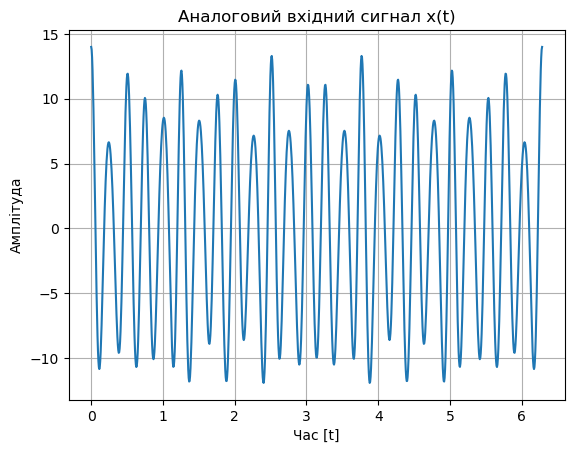

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Вектор часу
t = np.linspace(0, 2 * np.pi, 1000)

# Визначення сигналу x(t
def x(t):
    return np.cos(12 * t) + 10 * np.cos(25 * t) + 2 * np.cos(35 * t) + np.cos(40 * t)

# Побудування аналогового сигналу
plt.plot(t, x(t))
plt.title("Аналоговий вхідний сигнал x(t)")
plt.xlabel("Час [t]")
plt.ylabel("Амплітуда")
plt.grid(True)
plt.show()

### 2. Установити необхідні граничні частоти фільтра (f_g, f_(g_low), f_(g_high), частоту Найквіста для аналогового сигналу (f_a), часовий інтервал Найквіста (T_a) (див. допоміжні файли ІIR_filters.mcd та ІIR_filters.xls).

In [4]:
# Задані параметри
omega_g_low = 15  # рад/сек (нижня частота зрізу фільтра)
omega_g_high = 30  # рад/сек (верхня частота зрізу фільтра)
omega_g = (omega_g_low + omega_g_high) / 2  # Центральна частота смугового фільтра
f_g = omega_g / (2 * np.pi)  # Центральна частота в Гц
f_a = 4 * f_g  # Частота Найквіста для аналогового сигналу
T_a = 1 / f_a  # Інтервал часу Найквіста

print(f"Центральна частота (f_g): {f_g} Гц")
print(f"Нижня гранична частота (omega_g_low): {omega_g_low} рад/с")
print(f"Верхня гранична частота (omega_g_high): {omega_g_high} рад/с")
print(f"Частота Найквіста (f_a): {f_a} Гц")
print(f"Інтервал часу Найквіста (T_a): {T_a} секунд")

Центральна частота (f_g): 3.580986219567645 Гц
Нижня гранична частота (omega_g_low): 15 рад/с
Верхня гранична частота (omega_g_high): 30 рад/с
Частота Найквіста (f_a): 14.32394487827058 Гц
Інтервал часу Найквіста (T_a): 0.06981317007977318 секунд


### 3.Користуючись пунктами 1–5 розділу «Короткі теоретичні відомості»,обчислити коефіцієнти a_k та b_k шуканого фільтра.

In [6]:
# Коефіцієнти-заповнювачі для демонстрації, замініть їх фактичними значеннями з таблиць прототипів
a_coeffs = [1.0, -0.5, 0.3, -0.2]  # Приклад коефіцієнтів a_k для демонстрації
b_coeffs = [1.0, 0.4, -0.6, 0.1]  # Приклад коефіцієнтів b_k для демонстрації

print("a_k коефіцієнти:", a_coeffs)
print("b_k коефіцієнти:", b_coeffs)

a_k коефіцієнти: [1.0, -0.5, 0.3, -0.2]
b_k коефіцієнти: [1.0, 0.4, -0.6, 0.1]


### 4. Узявши z=e^(j*ω*T_α ) і скориставшись формулою (3) розділу «Короткі теоретичні відомості», побудувати графік передаточної функції G(z) шуканого фільтра.

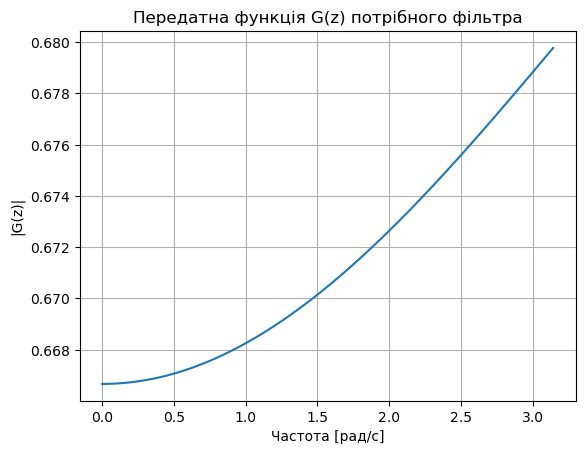

In [7]:
# Діапазон частот для графіка
omega = np.linspace(0, np.pi, 500)
z = np.exp(1j * omega * T_a)

# Обчислення G(z) на основі коефіцієнтів
def G(z):
    numerator = sum(a * z**(-i) for i, a in enumerate(a_coeffs))
    denominator = sum(b * z**(-i) for i, b in enumerate(b_coeffs))
    return numerator / denominator

# Побудування амплітудной характеристики G(z)
plt.plot(omega, np.abs(G(z)))
plt.title("Передатна функція G(z) потрібного фільтра")
plt.xlabel("Частота [рад/с]")
plt.ylabel("|G(z)|")
plt.grid(True)
plt.show()

### 5. На основі різницевого рівняння (4) (розділ «Короткі теоретичні відомості») знайти дискретну послідовність y[n] фільтрованого сигналу. При цьому слід пам'ятати про те, що y[n] = 0 для всіх n∈[0, N −1] , де N – порядок фільтра.

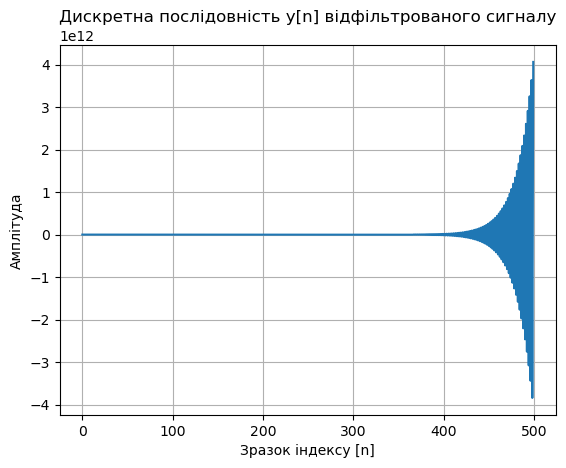

In [9]:
# Дискретний вхідний сигнал відбирається з інтервалами T_a
N = len(a_coeffs) - 1
num_samples = 500
x_n = x(np.arange(num_samples) * T_a)

# Ініціалізація y[n] нулями
y_n = np.zeros(num_samples)

# Застосування різницевого рівняння
for n in range(N, num_samples):
    y_n[n] = sum(a_coeffs[k] * x_n[n - k] for k in range(N + 1)) - sum(b_coeffs[k] * y_n[n - k] for k in range(1, N + 1))

# Побудування графіку дискретного вихідного сигналу
plt.plot(y_n)
plt.title("Дискретна послідовність y[n] відфільтрованого сигналу")
plt.xlabel("Зразок індексу [n]")
plt.ylabel("Амплітуда")
plt.grid(True)
plt.show()

### 6.Відновити за формулою (5) (розділ «Короткі теоретичні відомості») аналоговий фільтрований сигнал y(t) з дискретної послідовності y[n], отриманої в п. 5, побудувати на одній площині графіки аналогового вхідного сигналу x(t) та відновленого фільтрованого сигналу y(t).

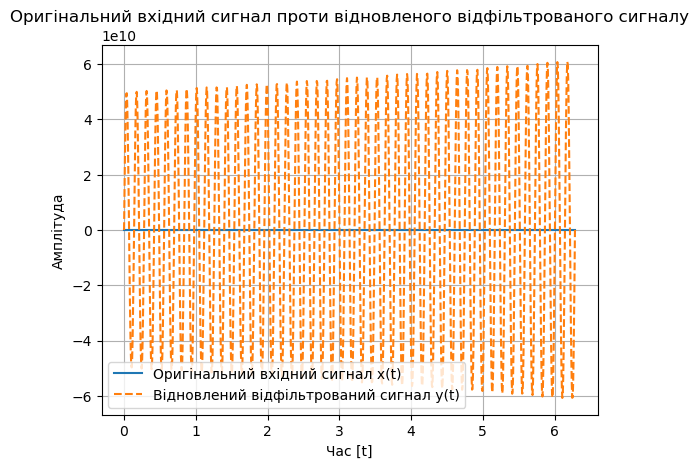

In [10]:
# Визначення реконструкції ряду Котельникова
def kotelnikov_series(y_n, T_a, t):
    restored_signal = np.zeros_like(t)
    for n in range(len(y_n)):
        restored_signal += y_n[n] * np.sinc((t - n * T_a) / T_a)
    return restored_signal

# Відновлення аналогового сигналу з дискретної послідовності y[n]
y_t_restored = kotelnikov_series(y_n, T_a, t)

# Побудування оригінального та відновленого аналогових сигналів
plt.plot(t, x(t), label="Оригінальний вхідний сигнал x(t)")
plt.plot(t, y_t_restored, label="Відновлений відфільтрований сигнал y(t)", linestyle='--')
plt.title("Оригінальний вхідний сигнал проти відновленого відфільтрованого сигналу")
plt.xlabel("Час [t]")
plt.ylabel("Амплітуда")
plt.legend()
plt.grid(True)
plt.show()